## Multiple Linear Regression

Now you know how to build a model with one X (feature variable) and Y (response variable). But what if you have three feature variables, or may be 10 or 100? Building a separate model for each of them, combining them, and then understanding them will be a very difficult and next to impossible task. By using multiple linear regression, you can build models between a response variable and many feature variables.

Let's see how to do that.

### Step_1 : Importing and Understanding Data

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Columns

- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
  objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

- In this dataset Charges is my target variable

In [4]:
# Importing advertising.csv
insurance = pd.read_csv('insurance.csv')

In [5]:
insurance.shape

(1338, 7)

In [6]:
# Looking at the first five rows
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Checking for Null values

In [7]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Visualizing Input Features with Target Feature

0.05567251565299186 -1.2450876526418673


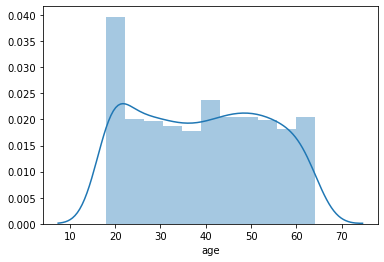

In [8]:
sns.distplot(insurance.age)
print(insurance.age.skew(),insurance.age.kurt())

0.2840471105987448 -0.05073153135467834


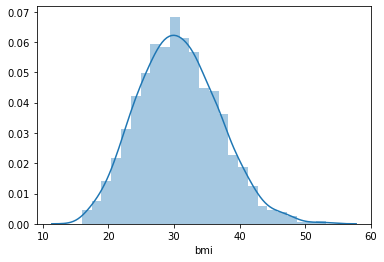

In [9]:
sns.distplot(insurance.bmi)
print(insurance.bmi.skew(),insurance.bmi.kurt())

In [10]:
insurance.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

0.9383804401702414

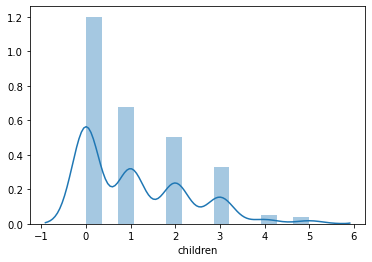

In [11]:
sns.distplot(insurance.children)
insurance.children.skew()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


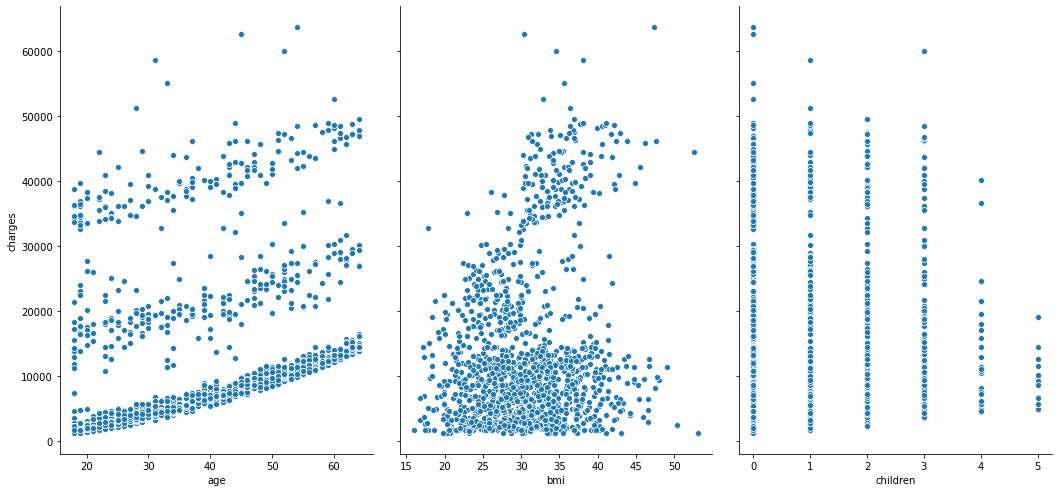

In [12]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(insurance, x_vars=['age','bmi','children'], y_vars='charges',size=7, aspect=0.7, kind='scatter')

- No feature is clearly able to describe my target variable i.e 'charges' over here

## Checking for Multi Collinearity

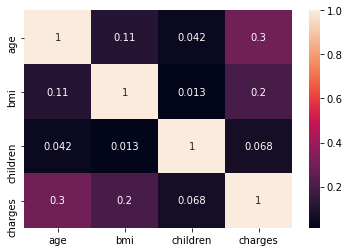

In [13]:
sns.heatmap(insurance.corr(),annot=True)
plt.show()

- No two input features are having high correlation with each other that means We don't have multi collinearity in our input features

## Checking the categorical features

In [14]:
insurance.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [15]:
insurance.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [16]:
insurance.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [17]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- we need to convert the categorical features into numbers

In [18]:
insurance['sex']= insurance['sex'].map({'male': 1, 'female': 0})
insurance['smoker']= insurance['smoker'].map({'yes': 1, 'no': 0})

In [19]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


- as region has more than two categories. We will be using One hot encoding to convert it.

In [20]:
region = pd.get_dummies(insurance['region'])

In [21]:
region.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


- removing one column as the information can be represented using 3 columns only

In [22]:
region = pd.get_dummies(insurance['region'],drop_first = True)

In [23]:
region.head()

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [24]:
insurance = pd.concat([insurance,region],axis = 1)

In [25]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


In [26]:
insurance.drop(['region'] , axis = 1,inplace= True)

In [27]:
insurance.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


- Now we have fixed all the categorical features

In [28]:
import numpy as np
charges_max = np.max(insurance.charges)
charges_min = np.min(insurance.charges)

## Rescaling the Features¶
It is extremely important to rescale the variables so that they have a comparable scale. There are twocoon ways of rescaling

1. Normalisation (min-max scaling) and
2. standardisation (mean-o, sigma-1) Let's try normalisation

In [29]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
insurance = insurance.apply(normalize) 

In [30]:
insurance.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,0.021739,0.0,0.321227,0.0,1.0,0.251611,0.0,0.0,1.0
1,0.000000,1.0,0.479150,0.2,0.0,0.009636,0.0,1.0,0.0
2,0.217391,1.0,0.458434,0.6,0.0,0.053115,0.0,1.0,0.0
3,0.326087,1.0,0.181464,0.0,0.0,0.333010,1.0,0.0,0.0
4,0.304348,1.0,0.347592,0.0,0.0,0.043816,1.0,0.0,0.0


# Splitting Data into Training and Testing Sets

In [31]:
# Putting feature variable to X
X = insurance.drop(['charges'],axis = 1)

In [32]:
X.head()

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,0.021739,0.0,0.321227,0.0,1.0,0.0,0.0,1.0
1,0.000000,1.0,0.479150,0.2,0.0,0.0,1.0,0.0
2,0.217391,1.0,0.458434,0.6,0.0,0.0,1.0,0.0
3,0.326087,1.0,0.181464,0.0,0.0,1.0,0.0,0.0
4,0.304348,1.0,0.347592,0.0,0.0,1.0,0.0,0.0


In [33]:
# Putting response variable to y
y = insurance['charges']

In [34]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

### Step_4 : Performing Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

In [37]:
# fit the model to the training data
lm.fit(X_train,y_train)

LinearRegression()

### Step_5 : Model Evaluation

In [38]:
# print the intercept
print(lm.intercept_)

-0.03315449838646614


In [39]:
# Let's see the coefficient
coeff_df = pd.DataFrame(lm.coef_,X_train.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,1.909235e-01
sex,-9.907459e-07
bmi,1.718790e-01
children,3.770451e-02
smoker,3.829350e-01
northwest,-1.205788e-02
southeast,-1.502674e-02
southwest,-2.556666e-02


### Step_6 : Predictions

In [40]:
# Making predictions using the model
y_pred = lm.predict(X_test)

### Step_7: Calculating Error Terms

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [42]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.00824123423390378
r_square_value : 0.7772310511733103


## Checking VIF

In [45]:
import statsmodels.api as sm
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [46]:
# Calculating Vif value|
vif_cal(input_data=insurance, dependent_col="charges")

,Var,Vif
2,bmi,5.01
0,age,2.91
6,southeast,2.12
1,sex,1.91
7,southwest,1.77
3,children,1.75
5,northwest,1.68
4,smoker,1.25


### Optional Step : Checking for P-value Using STATSMODELS

In [47]:
import statsmodels.api as sm
X_train_sm = X_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line
lm_1 = sm.OLS(y_train,X_train_sm).fit()

# print the coefficients
lm_1.params

const       -3.315450e-02
age          1.909235e-01
sex         -9.907459e-07
bmi          1.718790e-01
children     3.770451e-02
smoker       3.829350e-01
northwest   -1.205788e-02
southeast   -1.502674e-02
southwest   -2.556666e-02
dtype: float64

In [48]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     326.2
Date:                Tue, 21 Jul 2020   Prob (F-statistic):          2.08e-263
Time:                        15:57:17   Log-Likelihood:                 835.42
No. Observations:                 936   AIC:                            -1653.
Df Residuals:                     927   BIC:                            -1609.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0332      0.011     -2.924      0.0

### Step_8 : Implementing the results and running the model again

From the data above, you can conclude that Newspaper is insignificant.

In [49]:
# Removing Newspaper from our dataset
X_train_new = X_train.drop(['sex','northwest','southeast'],axis = 1)
X_test_new = X_test.drop(['sex','northwest','southeast'],axis = 1)

In [50]:
# Model building
lm.fit(X_train_new,y_train)

LinearRegression()

In [51]:
# Making predictions
y_pred_new = lm.predict(X_test_new)

In [52]:
mse = mean_squared_error(y_test, y_pred_new)
r_squared = r2_score(y_test, y_pred_new)
print(mse,r_squared)

0.008250330465026098 0.7769851707884199


### Conclusion: The difference between MSE of the model without dropping and with dropping the features is very less. Therefore its better to remove the features in order to prevent model from overfitting

Text(0, 0.5, 'Housing Price')

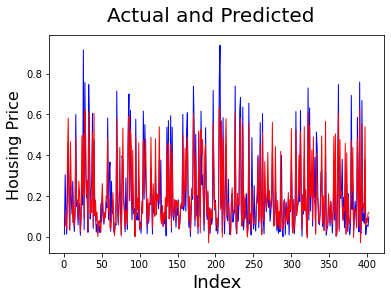

In [53]:
# Actual and Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,403,1)] # generating index 
fig = plt.figure() 
plt.plot(c,y_test, color="blue", linewidth=1, linestyle="-") #Plotting Actual
plt.plot(c,y_pred_new, color="red",  linewidth=1, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Housing Price', fontsize=16) 

Text(0, 0.5, 'ytest-ypred')

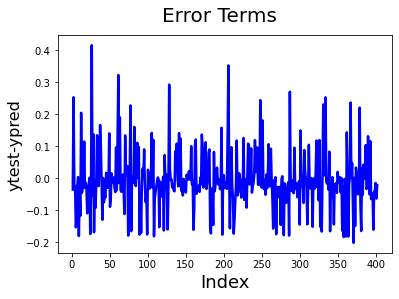

In [54]:
# Error terms
c = [i for i in range(1,403,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred_new, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0.5, 1.0, 'Actual vs Predictions')

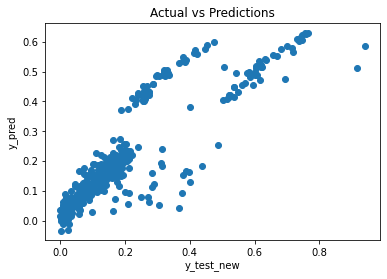

In [55]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test_new')
plt.ylabel('y_pred')
plt.title('Actual vs Predictions')

## Conclusion:
- Predicted and Actual values are showing positive correlation therefore our model is a very good model

Text(0, 0.5, 'Index')

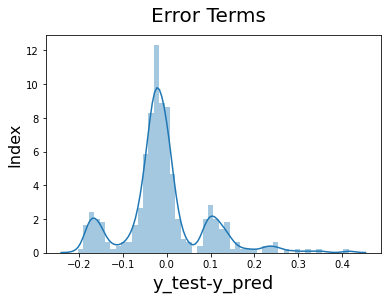

In [56]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_new),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)  

# Conclusion:
- The error in my final model is mostly between -.1 to .1 Therefore its a pretty good model

In [57]:
X_train_final = X_train_new
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_final = sm.add_constant(X_train_final)
# create a fitted model in one line
lm_final = sm.OLS(y_train,X_train_final).fit()

print(lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     521.4
Date:                Tue, 21 Jul 2020   Prob (F-statistic):          8.06e-267
Time:                        15:57:23   Log-Likelihood:                 834.00
No. Observations:                 936   AIC:                            -1656.
Df Residuals:                     930   BIC:                            -1627.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0400      0.010     -4.032      0.0

### Model Refinement Using RFE

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the less important features are pruned from the the current set of features. This procedure is recursively repeated on the pruned dataset until the desired number of features to select is reached.

In [58]:
from sklearn.feature_selection import RFE

In [59]:
rfe = RFE(lm, 5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [60]:
X_train.head()

,age,sex,bmi,children,smoker,northwest,southeast,southwest
966,0.717391,1.0,0.237692,0.4,1.0,1.0,0.0,0.0
522,0.717391,0.0,0.483051,0.0,0.0,0.0,0.0,0.0
155,0.565217,1.0,0.633844,0.0,0.0,1.0,0.0,0.0
671,0.239130,0.0,0.408932,0.0,0.0,0.0,0.0,0.0
1173,0.434783,1.0,0.357815,0.4,0.0,1.0,0.0,0.0


In [61]:
rfe = rfe.fit(X_train, y_train)

In [62]:
print(rfe.support_)
print(rfe.ranking_)

[ True False  True  True  True False False  True]
[1 4 1 1 1 3 2 1]


In [63]:
col = X_train.columns[rfe.support_]

In [64]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [65]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [66]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [67]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [68]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     521.4
Date:                Tue, 21 Jul 2020   Prob (F-statistic):          8.06e-267
Time:                        15:57:29   Log-Likelihood:                 834.00
No. Observations:                 936   AIC:                            -1656.
Df Residuals:                     930   BIC:                            -1627.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0400      0.010     -4.032      0.0

## Conclusion
- We had achieved the same result using RFE. We have got the same features that we got by eliminating the values which have p values greter than 0.05

# Denormalizing the output

In [70]:
actual_pred_y = y_pred_new*(charges_max - charges_min) + charges_min
actual_test = y_test*(charges_max - charges_min) + charges_min

Text(0, 0.5, 'Probability')

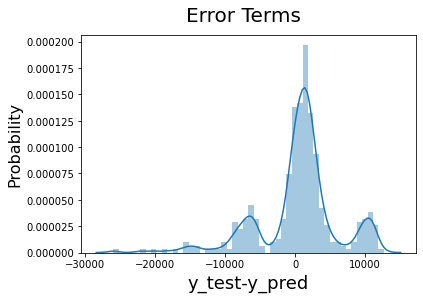

In [74]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((actual_pred_y-actual_test),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Probability', fontsize=16)  

# Conclusion: Most of the error values are near zero. Therefore the predictions are accurate enough